<a href="https://colab.research.google.com/github/kiakass/DeepLearning/blob/master/SML_MID_TERM_%EA%B3%BD%EC%A4%80%ED%99%98_%EC%A0%9C%EC%B6%9C%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MID-TERM PROJECT: FACIAL EXPRESSION CLASSIFICATION<br>

BDC114: INTRODUCTION TO STATISTICS AND MACHINE LEARNING<br>

> Given the samples of three facial expression classes, you are asked to build your own classfication model. <br>
> To enhance performance, you need to explore various steps of data exploration, preprocessing, model selection, and model tuning. <br>
> Your implementation should be concrete and complete.<br>
> - 22 features: extracted from an image<br>
> - 3 classes: angry, happy, and surprised<br><br>


Submission: Google Colab file (*.ipynb)
- For every step, you should make reasonable explanations and descriptions in
markdown format.
- Steps: data loading, data exploration, data cleaning/preprocessing, data split
(train-validation-test), model training (selection, tuning), performance evalu-
ation
- The experimental results need to be reported in various metrics (accuracy,
precision, recall, macro-F1).
- The evaluation will be conducted on an independent test set in terms of the
macro-F1 score.
- You need to dene a method of \accuracy, mF1 = test evaluation(test samples,
test labels)" that automatically processes every step in a test phase.
> 

# ■ Model Design

> $ {\color{royalblue} {1.\, Data\, Load}}$
>> - facial_expression_train_dataset 을 github에 upload 하여 get 함 <br>
>> - column 을 X#, Y 로 변경 <br>

> $ {\color{royalblue} {2.\, EDA\, : Exploratory\, Data\, Analysis}} $<br>
>> - Data는 22개의 feature, Y label 1개(3개의 class) 로 구성되어 있음 <br>
>> - Data는 numerical 하고, missing value 및 outlier 는 보이지 않음 <br>

> $ {\color{royalblue} {3.\, 전처리}} $
>> -  X data :  standardization <br>
>> - Y label에 대해 onehot encoding 수행 <br>

> $ {\color{royalblue} {4.\, Model}} $ - Classfication 처리를 위해 아래 3가지 모델을 사용함
>> - SDGRegressor : 교재
>> - RandomForest : 교재
>> - Deel Learing : My_model

> $ {\color{royalblue} {5.\, Launch\, Model}} $ [모델 테스트 및 검증]
>> - Deep Learning Model 에서 최종적으로 얻은 model 을 hdf5 로 저장
>> - $ {\color{salmon} {이\, 위치에 \,test할\, file\, or\, url 을\, 업로드하고\, 저장한\, 모델을\, load 하여\, 테스트하도록\, 코딩하였음}}$

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.Data Prepration

### 1.Data loading

- Data 를 github 로 업로드하고, Column 명을 X#n, Y 로 변경

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample

data_path = 'https://raw.githubusercontent.com/kiakass/share/master/facial_expression_train_dataset.csv'

def load_facial_data(data_path):
    ''' cloumn name 을 X#n, Y로 변경 '''    
    return pd.read_csv(data_path,skiprows=[0],names=np.r_[['Y'],['X'+str(x) for x in range(0,22)]].tolist())

facial = load_facial_data(data_path)

### 2.EDA

Boodstraping / resampling 기법 사용

In [3]:
facial= resample(facial,n_samples=200)

> 데이터수가 적어서 bootstrapping 기법을 사용하여 데이터를 증식하였음

In [4]:
X=facial.iloc[:,1:]
y=facial.iloc[:,:1]

In [5]:
y.Y.value_counts() # 값의 범위 확인

1    73
3    67
2    60
Name: Y, dtype: int64

In [6]:
facial.info() #결측치 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 53
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       200 non-null    int64  
 1   X0      200 non-null    float64
 2   X1      200 non-null    float64
 3   X2      200 non-null    float64
 4   X3      200 non-null    float64
 5   X4      200 non-null    float64
 6   X5      200 non-null    float64
 7   X6      200 non-null    float64
 8   X7      200 non-null    float64
 9   X8      200 non-null    float64
 10  X9      200 non-null    float64
 11  X10     200 non-null    float64
 12  X11     200 non-null    float64
 13  X12     200 non-null    float64
 14  X13     200 non-null    float64
 15  X14     200 non-null    float64
 16  X15     200 non-null    float64
 17  X16     200 non-null    float64
 18  X17     200 non-null    float64
 19  X18     200 non-null    float64
 20  X19     200 non-null    float64
 21  X20     200 non-null    float64
 22  X21

In [7]:
facial.describe()

,Y,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.97000,8.780809,10.491683,10.888326,11.139320,5.621951,4.816418,6.040695,5.249942,5.203198,5.360502,5.429407,5.908956,7.770602,8.003834,13.165250,16.917705,20.649955,17.450084,13.274929,10.258689,9.005149,10.086448
std,0.83822,7.103497,7.566094,7.999349,8.641409,3.781555,3.802550,4.094981,3.756165,4.161532,3.948170,4.015869,4.671016,4.426723,4.752543,6.916312,12.805328,18.995754,13.442027,6.985000,5.406999,4.808108,5.425479
min,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.414200,0.000000,0.000000,2.000000,4.123100,1.414200,1.000000,2.000000
25%,1.00000,3.605600,5.000000,5.385200,5.000000,2.828400,2.236100,3.605600,3.000000,2.236100,3.000000,2.236100,3.000000,4.212725,4.212725,7.615800,8.000000,7.071100,8.602300,7.176100,6.383475,5.099000,5.385200
50%,2.00000,7.175600,8.000000,8.944300,8.602300,5.000000,4.123100,5.000000,4.242600,4.472100,4.242600,4.472100,4.472100,7.141100,7.071100,11.553250,13.000000,12.649100,12.000000,12.041600,9.434000,7.936250,9.055400
75%,3.00000,12.041600,14.142100,13.490575,15.385950,7.071100,5.385200,8.062300,6.082800,5.385200,6.324600,6.403100,7.615800,11.045400,10.295600,16.124500,23.349050,32.871725,24.515600,18.727075,14.376050,13.038225,14.317800
max,3.00000,35.128300,36.013900,40.162200,40.025000,18.439100,18.439100,20.396100,19.924900,19.646900,20.099800,18.110800,24.515300,18.439100,20.248500,30.265500,53.084800,64.124900,51.088200,29.000000,20.591300,21.587000,21.587000


> Data를 확인한 결과 결측치, Outlier등 데이터에 특이 사항은 없어 보임

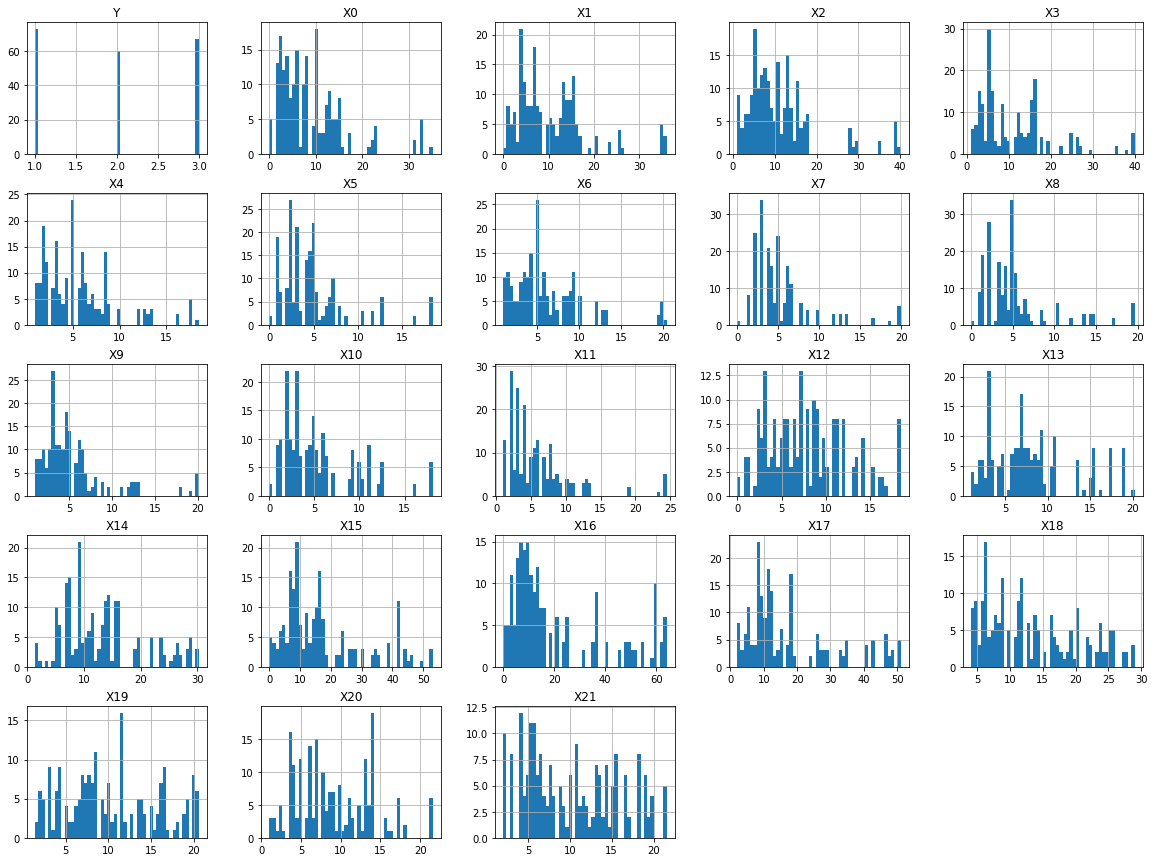

In [8]:
_=facial.hist(bins=50, figsize=(20,15))

### 3.Preprocessing

#### 1) Split train/test

In [9]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [10]:
facial = load_facial_data(data_path)
train_set, test_set = train_test_split(facial, test_size=0.2, random_state=2)
X_train = train_set.drop(['Y'], axis=1)
Y_train = np.array(train_set.Y.copy())
X_test = test_set.drop(['Y'], axis=1)
Y_test = np.array(test_set.Y.copy())

#### 2) Y label Onehot Encoding

In [11]:
oe=OneHotEncoder(sparse=False)
Y_train_oe = oe.fit_transform(np.array(Y_train).reshape(-1,1))
Y_test_oe = oe.fit_transform(np.array(Y_test).reshape(-1,1))

In [12]:
np.c_[Y_test[:10],Y_test_oe[:10]]

array([[2., 0., 1., 0.],
       [2., 0., 1., 0.],
       [3., 0., 0., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [2., 0., 1., 0.],
       [3., 0., 0., 1.],
       [2., 0., 1., 0.],
       [3., 0., 0., 1.]])

In [13]:
# inverse value 확인
oe.inverse_transform(Y_train_oe).reshape(-1)

array([3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 1,
       3, 1, 2, 2, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1,
       1, 3, 3, 2, 2, 2, 2, 1, 3, 2, 2, 1, 2, 3, 2, 3, 2, 2, 1, 3, 2, 1,
       3, 1, 2])

#### 3) Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_prepared = std.fit_transform(X_train)
X_test_prepared = std.fit_transform(X_test)

## 2.Model

Function - Metric

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

class Metric():
    def __init__(self,average=None):
        print('# model result...\n') 
        pass
    
    def confusion_metric(self, y, y_pred):
        print('confustion_matrix : \n',confusion_matrix(y, y_pred),'\n')

    def metric(self, y, y_pred):

        a_score=accuracy_score(y, y_pred)
        p_score=precision_score(y, y_pred, average=average)
        r_score=recall_score(y, y_pred, average=average)
        f_score=f1_score(y, y_pred, average=average)
        print('accuracy  :', p_score,'\n', 
              '\bprecision :', p_score,'\n', 
              '\brecall    :', r_score,'\n\n',
              '\bf1_score  :', f_score,'\n')
        
def mse(y,y_hat):
  return np.sqrt(mean_squared_error(y,y_hat))

def cross_val(model, y, y_hat):
  return np.sqrt(-cross_val_score(model, y, y_hat, scoring="accuracy", cv=5))

def display_scores(scores):
    print("Scores :", scores)
    print("Mean :", scores.mean())
    print("Standard deviation:", scores.std())

Function - Data Preprocessing : spilit, standardization, onehot encoding

In [16]:
# Model package.module import
from keras.optimizers import rmsprop_v2 
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
# bootstrap
from sklearn.utils import resample
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix


# train/test split
def make_train_test(df, sp_sizpe, type=None):
    train_set, test_set = train_test_split(facial, test_size=sp_sizpe, random_state=2)
    X_train = train_set.drop(['Y'], axis=1)
    Y_train = train_set.Y.copy()
    X_test = test_set.drop(['Y'], axis=1)
    Y_test = test_set.Y.copy()

    if type == None :

      #onehot encoding
      oe=OneHotEncoder(sparse=False)
      Y_train = oe.fit_transform(np.array(Y_train).reshape(-1,1))
      Y_test = oe.fit_transform(np.array(Y_test).reshape(-1,1))

    return X_train, Y_train, X_test, Y_test

def make_test(df):
    X_test = df.drop(['Y'], axis=1)
    Y_test = df.Y.copy()

    #onehot encoding
    oe=OneHotEncoder(sparse=False)
    Y_test = oe.fit_transform(np.array(Y_test).reshape(-1,1))

    return X_test, Y_test

def standardization(X):

    std = StandardScaler()
    x_std = std.fit_transform(X)
    return x_std

def inverse_trans(y):
    '''
    : onehot covert to label
    '''
    return oe.inverse_transform(y).reshape(-1)

### 1.SDGRegressor

##### (1) Model Training, Grid Search

In [17]:
from sklearn.linear_model import SGDClassifier

# data load
facial = load_facial_data(data_path)
facial = resample(facial,n_samples=500).reset_index(drop=True) #bootstrap
# spilt train/test & onehot y
X_train, Y_train, X_test, Y_test = make_train_test(facial,0.2,1)
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)
# starndadization
std = StandardScaler()
X_train_prepared = std.fit_transform(X_train)
X_test_prepared = std.fit_transform(X_test)

#model run
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train_prepared,Y_train)

(400, 22) (400,) (100, 22) (100,)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [18]:
# cross validataion
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train_prepared,Y_train, cv=3, scoring="accuracy")

array([1., 1., 1.])

In [19]:
# prediction
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_prepared, Y_train, cv=3)

##### (2) Scores(CF,ACC, PRE, REC, F1)

In [20]:
# train
average="macro"
metric = Metric(average)
metric.confusion_metric(Y_train, y_train_pred)
## precision, recall, f1 scores
metric.metric(Y_train, y_train_pred)

# model result...

confustion_matrix : 
 [[134   0   0]
 [  0 130   0]
 [  0   0 136]] 

accuracy  : 1.0 
 precision : 1.0 
 recall    : 1.0 

 f1_score  : 1.0 



In [21]:
# Test set 
y_test_pred = sgd_clf.predict(X_test_prepared)
metric.confusion_metric(Y_test, y_test_pred)
metric.metric(Y_test, y_test_pred)

confustion_matrix : 
 [[27  0  0]
 [ 0 34  0]
 [ 0  0 39]] 

accuracy  : 1.0 
 precision : 1.0 
 recall    : 1.0 

 f1_score  : 1.0 



### 2.Randomforest

G

##### (1) Model Training, Grid Search

In [22]:
#Data loading, bootstraping
facial = load_facial_data(data_path)
facial = resample(facial,n_samples=500) #bootstrap

# spilt train/test & onehot y
X_train, Y_train, X_test, Y_test = make_train_test(facial,0.2)
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

# starndadization
std = StandardScaler()
X_train_prepared = std.fit_transform(X_train)
X_test_prepared = std.fit_transform(X_test)

(400, 22) (400, 3) (100, 22) (100, 3)


In [23]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = [
              {'n_estimators':[3,10,30,35,40], 'max_features':[2,4,6,8,10,12]},
              {'bootstrap':[False],'n_estimators':[3,5,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)

grid_search.fit(X_train_prepared, Y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:    7.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [24]:
for r, _ in enumerate(grid_search.cv_results_['mean_test_score']):
    print('Accuracy')
    print("%0.3f +/- %0.3f %r"
          % (grid_search.cv_results_['mean_test_score'][r], 
             grid_search.cv_results_['std_test_score'][r] / 2.0, 
             grid_search.cv_results_['params'][r]))

0.985 +/- 0.010 {'max_features': 2, 'n_estimators': 3}
0.995 +/- 0.005 {'max_features': 2, 'n_estimators': 10}
0.995 +/- 0.005 {'max_features': 2, 'n_estimators': 30}
0.995 +/- 0.005 {'max_features': 2, 'n_estimators': 35}
0.995 +/- 0.005 {'max_features': 2, 'n_estimators': 40}
0.990 +/- 0.007 {'max_features': 4, 'n_estimators': 3}
1.000 +/- 0.000 {'max_features': 4, 'n_estimators': 10}
0.995 +/- 0.005 {'max_features': 4, 'n_estimators': 30}
0.995 +/- 0.005 {'max_features': 4, 'n_estimators': 35}
1.000 +/- 0.000 {'max_features': 4, 'n_estimators': 40}
0.997 +/- 0.002 {'max_features': 6, 'n_estimators': 3}
1.000 +/- 0.000 {'max_features': 6, 'n_estimators': 10}
0.995 +/- 0.005 {'max_features': 6, 'n_estimators': 30}
1.000 +/- 0.000 {'max_features': 6, 'n_estimators': 35}
0.995 +/- 0.005 {'max_features': 6, 'n_estimators': 40}
0.990 +/- 0.006 {'max_features': 8, 'n_estimators': 3}
0.997 +/- 0.002 {'max_features': 8, 'n_estimators': 10}
1.000 +/- 0.000 {'max_features': 8, 'n_estimators': 

In [25]:
print(grid_search.best_params_)
final_model = grid_search.best_estimator_

{'max_features': 4, 'n_estimators': 10}


##### (2) Scores(CF, ACC, PRE, REC, F1)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = final_model.predict(X_test_prepared)
test_rmse=mse(Y_test, y_test_pred)
print('test rmse :',test_rmse,'\n')

metric = Metric("macro")
inverse_y = inverse_trans(Y_test)
inverse_y_pred = inverse_trans(y_test_pred)
metric.confusion_metric(inverse_y, inverse_y_pred)
metric.metric(inverse_y, inverse_y_pred)

test rmse : 0.0 

# model result...

confustion_matrix : 
 [[32  0  0]
 [ 0 36  0]
 [ 0  0 32]] 

accuracy  : 1.0 
 precision : 1.0 
 recall    : 1.0 

 f1_score  : 1.0 



### 3.Deep Learning

##### (1) Model Traing, Evaluation

모델 및 파라미터 구성
- keras Deep learning 모델을 구성하여 여러 depth layer 의 구성 및 hyper parameter 를 조정하여 테스트 하였음 <br>
- layer 를 여러층으로 구성, dense output dim 의 값을 다양하게 변경<br>
- overfitting을 막기위해 dropout을 사용하였고, rate 를 0.1~0.5 변경 <br>

In [27]:
# Model package.module import
import keras
from keras.models import Sequential,load_model
import keras.layers as layers
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.optimizers import rmsprop_v2 
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
# bootstrap
from sklearn.utils import resample
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# model 구성
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20,input_dim=n_inputs))
    model.add(Dense(3))
    model.add(Dropout(0.2))
    model.add(Dense(10))
    model.add(Dropout(0.1))
    model.add(Dense(5))
    model.add(Dense(n_outputs, activation='softmax'))

    #model compile
    model.compile(loss='mse', optimizer='adam',metrics=['accuracy']) # adam , rmsprop = RMSprop(lr=0.01)
    return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model_cv(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
      # prepare data
      X_train, X_test = X[train_ix], X[test_ix]
      y_train, y_test = y[train_ix], y[test_ix]
      # define model
      model = get_model(n_inputs, n_outputs)
      # fit model
      history=model.fit(X_train, y_train, verbose=0, epochs=100)
      # make a prediction on the test set
      yhat = model.predict(X_test)
      yhat=inverse_trans(yhat)
      y_test=inverse_trans(y_test)
      # round probabilities to class labels
      yhat = yhat.round()#;print(yhat,y_test)
      # calculate accuracy
      acc = accuracy_score(y_test, yhat)
      # store result
      print('>%.3f' % acc)
      results.append(acc)
    return model, results

def evaluate_model(model, X_train_prepared, Y_train, X_test_prepared, Y_test):

    n_inputs, n_outputs = X_train_prepared.shape[1], Y_train.shape[1]
    model=get_model(n_inputs, n_outputs)

    # Early Stop : patience #n 회 이상 val_loss 가 변화가 없으면 중단
    es = EarlyStopping(monitor='val_loss', patience=50, min_delta=0.01)
    # model fit
    history = model.fit(X_train_prepared, Y_train, batch_size=50, epochs=1000,verbose=0,
                        validation_data=(X_test_prepared, Y_test), callbacks=[es])
    return model, history

◆ Original Data : n = 87

In [28]:
if __name__ == '__main__':

    # load data
    facial = load_facial_data(data_path)
    #facial = resample(facial,n_samples=500) #bootstrap
    # spilt train/test & onehot y
    X_train, Y_train, X_test, Y_test = make_train_test(facial,0.2)
    print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)
    # starndadization
    std = StandardScaler()
    X_train_prepared = std.fit_transform(X_train)
    X_test_prepared = std.fit_transform(X_test)
    # evaluate model - cross validation for train data
    model, results = evaluate_model_cv(X_train_prepared, Y_train)
    # evaluate model - test data
    model, history = evaluate_model(model, X_train_prepared, Y_train, X_test_prepared, Y_test)
    # get model
    #model=get_model(X_test_prepared.shape[1], Y_test.shape[1])

    # summarize performance
    print('Train Accuracy: %.3f (%.3f)' % (np.mean(results), np.std(results)))

    loss, acc = model.evaluate(X_test_prepared,  Y_test, verbose=2)
    print('Test Accuracy: %.3f loss : %.3f' % (acc, loss))

(69, 22) (69, 3) (18, 22) (18, 3)
>1.000
>1.000
>0.857
>1.000
>1.000
>1.000
>1.000
>0.857
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>0.857
>1.000
>0.714
>1.000
>1.000
>1.000
>1.000
>0.857
>1.000
>1.000
>1.000
>1.000
Train Accuracy: 0.971 (0.068)
1/1 - 0s - loss: 0.0365 - accuracy: 0.8889
Test Accuracy: 0.889 loss : 0.037


In [29]:
# Scores
average="macro"
metric = Metric(average)
y_test_pred = model.predict(X_test_prepared)
inverse_y = inverse_trans(Y_test)
inverse_y_pred = inverse_trans(y_test_pred)
metric.confusion_metric(inverse_y, inverse_y_pred)
metric.metric(inverse_y, inverse_y_pred)

# model result...

confustion_matrix : 
 [[7 0 2]
 [0 5 0]
 [0 0 4]] 

accuracy  : 0.8888888888888888 
 precision : 0.8888888888888888 
 recall    : 0.9259259259259259 

 f1_score  : 0.8916666666666666 



◆ Bootstrapping : n = 500

In [30]:
if __name__ == '__main__':

    # load data
    facial = load_facial_data(data_path)
    facial = resample(facial,n_samples=500) #bootstrap
    # spilt train/test & onehot y
    X_train, Y_train, X_test, Y_test = make_train_test(facial,0.2)
    print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)
    # starndadization
    std = StandardScaler()
    X_train_prepared = std.fit_transform(X_train)
    X_test_prepared = std.fit_transform(X_test)
    # evaluate model - cross validation for train data
    model, results = evaluate_model_cv(X_train_prepared, Y_train)
    # evaluate model - test data
    model, history = evaluate_model(model, X_train_prepared, Y_train, X_test_prepared, Y_test)
    # get model
    #model=get_model(X_test_prepared.shape[1], Y_test.shape[1])

    # summarize performance
    print('Train Accuracy: %.3f (%.3f)' % (np.mean(results), np.std(results)))

    loss, acc = model.evaluate(X_test_prepared,  Y_test, verbose=2)
    print('Test Accuracy: %.3f loss : %.3f' % (acc, loss))

(400, 22) (400, 3) (100, 22) (100, 3)
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
>1.000
Train Accuracy: 1.000 (0.000)
4/4 - 0s - loss: 3.3947e-04 - accuracy: 1.0000
Test Accuracy: 1.000 loss : 0.000


##### (2) Display model loss

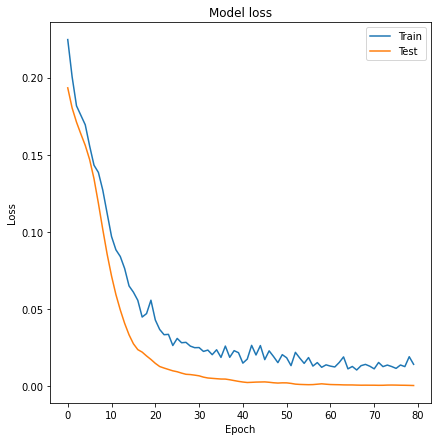

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(0,1.4)
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

##### (3) Scores(CF, ACC, PRE, REC, F1)

In [32]:
# Scores
average="macro"
metric = Metric(average)

y_test_pred = model.predict(X_test_prepared)
inverse_y = inverse_trans(Y_test)
inverse_y_pred = inverse_trans(y_test_pred)
metric.confusion_metric(inverse_y, inverse_y_pred)
metric.metric(inverse_y, inverse_y_pred)

# model result...

confustion_matrix : 
 [[24  0  0]
 [ 0 37  0]
 [ 0  0 39]] 

accuracy  : 1.0 
 precision : 1.0 
 recall    : 1.0 

 f1_score  : 1.0 



In [33]:
np.sqrt(min(history.history['val_loss']))

0.01842476112115721

In [34]:
# final model save
model.save('my_model.h5')

## 3.Result


★ 딥러닝이 가장 좋은 결과를 나타냈음

★ 다양한 모델 구성 및 hyper parameters 조합으로 테스트하였으나, 
- f1 score 를 0.9 이상 올리기가 불가능하였고 결국 데이터량이 적다고 판단되었음.<br>
- bootsrapping(n=500) 을 사용함<br>
- 최종적으로 <br>
loss(rmse) =0.02 , Confusion matrix, accuracy, precision, recall, f1 score = 1 을 얻게됨

## 4.Launch Model

Main function 에 eval_path 에 New data(csv) 를  에 넣으면 아래단계가 자동 수행되도록 코딩<br>
 1) loading > 2) preprocessing > 3) model loadding > 4) Prediction > 5) Metric <br>

In [35]:
import time
import urllib.request
import zipfile

def get_model():
    '''
    : 모델 download to /content/.. from Github
    '''
    url = 'https://raw.githubusercontent.com/kiakass/share/master/my_model.zip'
    savename = "/content/my_model.zip"

    mem = urllib.request.urlopen(url).read()
    with open(savename, 'wb') as f:
        f.write(mem)
    urllib.request.urlretrieve(url,savename)

    path_to_zip_file = "/content/my_model.zip"
    directory_to_extract_to = '/content/'
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

    saved_model = load_model("/content/my_model.h5")

    return saved_model

def evaluation_test(model, eval_path):

    
    #load data
    df = load_facial_data(eval_path)
    print('data loadiing...')
    # split : X, y 
    x_test, y_test = make_test(df)
    print('data preprocessing...')
    # standardization
    x_test_prepared = std.fit_transform(x_test)

    # predict y
    print('model prediction...\n')
    y_pred = np.round(model.predict(x_test_prepared, verbose=0))
    # inverse onehot to y_labels
    inverse_y = inverse_trans(y_test)
    inverse_y_pred = inverse_trans(y_pred)
    
    # Metric
    ## confusion matrix
    metric = Metric()
    metric.confusion_metric(inverse_y, inverse_y_pred)
    ## precision, recall, f1 scores
    metric.metric(inverse_y, inverse_y_pred)

if __name__ == '__main__':

    # input new data : download path 만 바꿔주면 됩니다.
    eval_path = 'https://raw.githubusercontent.com/kiakass/share/master/facial_test.csv'

    # get model : save된 모델 download
    saved_model = get_model()

    # evaluation new data
    evaluation_test(saved_model, eval_path)

data loadiing...
data preprocessing...
model prediction...

# model result...

confustion_matrix : 
 [[10  0  0]
 [ 0  8  0]
 [ 0  0  9]] 

accuracy  : 1.0 
 precision : 1.0 
 recall    : 1.0 

 f1_score  : 1.0 

